# Chapter 6. 일반선형모델

## 6.3 로지스틱 회귀

### 6.3.9 분석준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 6.3.10 데이터 읽어 들이기와 그래프 표시

In [3]:
# 시험 합격 여부 데이터
test_result = pd.read_csv("./data/6-3-1-logistic-regression.csv")
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


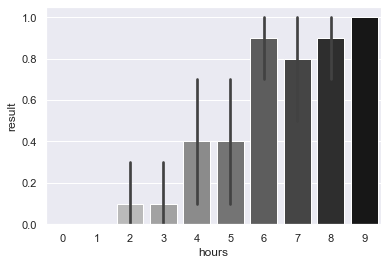

In [3]:
# 공부시간별 시험 합격률의 막대그래프
sns.barplot(x = "hours",y = "result", 
            data = test_result, palette='gray_r')

In [4]:
# 공부시간마다의 합격률
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 6.3.11 로지스틱 회귀(실습)

In [5]:
# 로지스틱 회귀모델 추정
mod_glm = smf.glm(formula = "result ~ hours", 
                  data = test_result, 
                  family=sm.families.Binomial()).fit()

### 6.3.12 로지스틱 회귀 결과의 출력

In [6]:
# 추정결과 출력
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 28 May 2023   Deviance:                       68.028
Time:                        22:29:49   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### 6.3.13 모델 선택

In [7]:
# Null모델 추정
mod_glm_null = smf.glm(
    "result ~ 1", data = test_result, 
    family=sm.families.Binomial()).fit()

In [8]:
# AIC 비교
print("Null모델　：", mod_glm_null.aic.round(3))
print("변수가 있는 모델：", mod_glm.aic.round(3))

Null모델　： 139.989
변수가 있는 모델： 72.028


### 6.3.14 로지스틱 회귀곡선 그래프

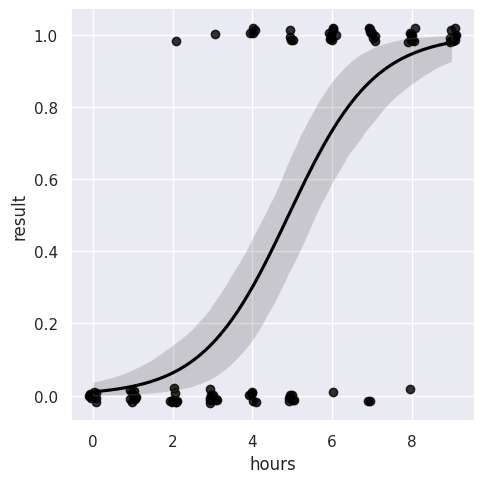

In [9]:
# lmplotでロジスティック回帰曲線を図示する
sns.lmplot(x = "hours", y = "result",
           data = test_result, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

### 6.3.15 성공확률 예측

In [10]:
# 0~9까지 1씩 증가시키는 등차수열
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
# 성공확률의 예측치
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 6.3.17 로지스틱 회귀계수와 오즈비의 관계

In [11]:
# 공부시간이 1시간일 때의 합격률
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 공부시간이 2시간일 때의 합격률
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [12]:
# 오즈
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# 로그오즈비
np.log(odds_2 / odds_1)

0    0.92889
dtype: float64

In [13]:
# 공부시간의 계수
mod_glm.params["hours"]

0.929

In [14]:
# 계수에 exp를 취한 값 = 오즈비
np.exp(mod_glm.params["hours"])

2.532